# U.S._Chronic_Disease_Indicators Study

In [1]:
### Introduce Dataset for the US Chronic Desease Indicator
### Import seaborn and matplotlib libraries
### Exported dataset from the website as CSV file and uploaded to Jupiter Notebook and displaying sample of data

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
df=pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')
df.head (5)

/var/folders/c7/mz1tyr_52blbghjw2d3b8z1c0000gn/T/ipykernel_35245/1712030707.py:10: DtypeWarning: Columns (7,19,20,21,22,26,27,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueTypeID,...,TopicID,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2013,2013,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,CrdPrev,...,ALC,ALC1_1,NaN,6,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2013,2013,CO,Colorado,YRBSS,Alcohol,Alcohol use among youth,NaN,%,CrdPrev,...,ALC,ALC1_1,NaN,8,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2013,2013,CT,Connecticut,YRBSS,Alcohol,Alcohol use among youth,NaN,%,CrdPrev,...,ALC,ALC1_1,NaN,9,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2013,2013,DC,District of Columbia,YRBSS,Alcohol,Alcohol use among youth,NaN,%,CrdPrev,...,ALC,ALC1_1,NaN,11,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2013,2013,DE,Delaware,YRBSS,Alcohol,Alcohol use among youth,NaN,%,CrdPrev,...,ALC,ALC1_1,NaN,10,OVERALL,OVR,NaN,NaN,NaN,NaN


In [2]:
### Number of rows and columns
df.shape

(237961, 34)

In [3]:
### Defining columns:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueTypeID',
       'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'TopicID', 'QuestionID', 'ResponseID', 'LocationID',
       'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [4]:
### Analiziing the structure of the dataset: 
df.describe

<bound method NDFrame.describe of         YearStart  YearEnd LocationAbbr          LocationDesc DataSource  \
0            2013     2013           CA            California      YRBSS   
1            2013     2013           CO              Colorado      YRBSS   
2            2013     2013           CT           Connecticut      YRBSS   
3            2013     2013           DC  District of Columbia      YRBSS   
4            2013     2013           DE              Delaware      YRBSS   
...           ...      ...          ...                   ...        ...   
237956       2012     2012           WI             Wisconsin      BRFSS   
237957       2012     2012           WY               Wyoming      BRFSS   
237958       2012     2012           GU                  Guam      BRFSS   
237959       2012     2012           PR           Puerto Rico      BRFSS   
237960       2012     2012           VI        Virgin Islands      BRFSS   

               Topic                                 

In [5]:
### Dropping columns that are not required for this study:

df_new = df[['YearStart', 'YearEnd', 'LocationDesc','Topic', 'Question', 'DataValueUnit',
       'DataValueType', 'DataValue', 'StratificationCategory1', 'Stratification1',]]
df_new.head(5)

,YearStart,YearEnd,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,StratificationCategory1,Stratification1
0,2013,2013,California,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall
1,2013,2013,Colorado,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall
2,2013,2013,Connecticut,Alcohol,Alcohol use among youth,%,Crude Prevalence,36.7,Overall,Overall
3,2013,2013,District of Columbia,Alcohol,Alcohol use among youth,%,Crude Prevalence,31.4,Overall,Overall
4,2013,2013,Delaware,Alcohol,Alcohol use among youth,%,Crude Prevalence,36.3,Overall,Overall


In [6]:
### RENAMING COLUMNS:
dfnew = df_new.rename(columns={'LocationDesc': 'State', 'Topic': 'Disease', 'Question': 'Indicator', 'DataValueUnit': 'Unit', 
                               'DataValueType': 'Type', 'DataValue': 'Value', 
                               'StratificationCategory1': 'Category', 'Stratification1': 'Category_Data'}) 
dfnew.head(3)

,YearStart,YearEnd,State,Disease,Indicator,Unit,Type,Value,Category,Category_Data
0,2013,2013,California,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall
1,2013,2013,Colorado,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,Overall,Overall
2,2013,2013,Connecticut,Alcohol,Alcohol use among youth,%,Crude Prevalence,36.7,Overall,Overall


In [7]:
# Dropping rows containing No data available, null in Category column and "unknown" in race category:
dfnew.replace(['No data available', 'null', '-', '~', '****' 'UNKNOWN'], pd.NA, inplace=True)
df_clean = dfnew.dropna()


In [8]:
### analyzing the dataset after the columns are renaled and invalid data is removed:
df_clean.describe

<bound method NDFrame.describe of         YearStart  YearEnd                 State       Disease  \
2            2013     2013           Connecticut       Alcohol   
3            2013     2013  District of Columbia       Alcohol   
4            2013     2013              Delaware       Alcohol   
5            2013     2013               Florida       Alcohol   
6            2013     2013               Georgia       Alcohol   
...           ...      ...                   ...           ...   
237943       2012     2012              Oklahoma  Older Adults   
237944       2012     2012                Oregon  Older Adults   
237945       2012     2012          Pennsylvania  Older Adults   
237947       2012     2012        South Carolina  Older Adults   
237954       2012     2012            Washington  Older Adults   

                                                Indicator Unit  \
2                                 Alcohol use among youth    %   
3                                 Alcohol

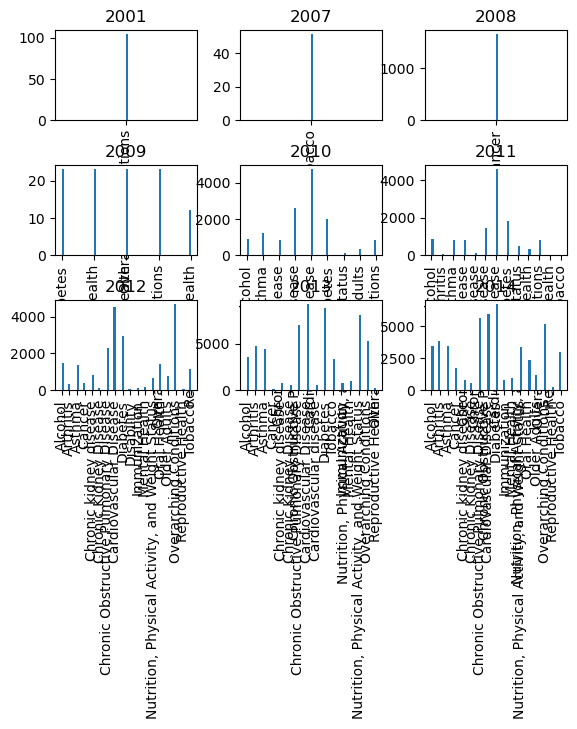

In [9]:
### ANALIZING DATA BY Year Start AND Topic
df_clean.hist(column='Disease', by='YearStart', bins=60)
plt.show()

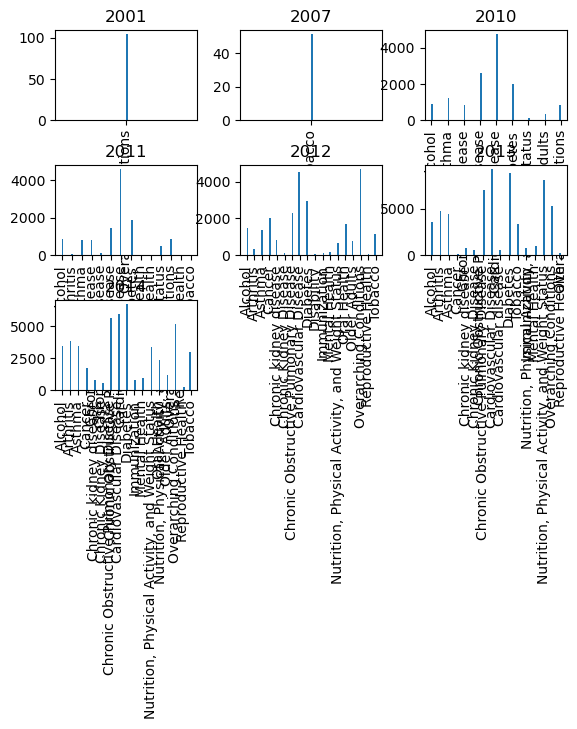

In [10]:
### ANALIZING DATA BY Year Start AND Topic
df_clean.hist(column='Disease', by='YearEnd', bins=80)
plt.show()

<Axes: xlabel='Desease Name:'>

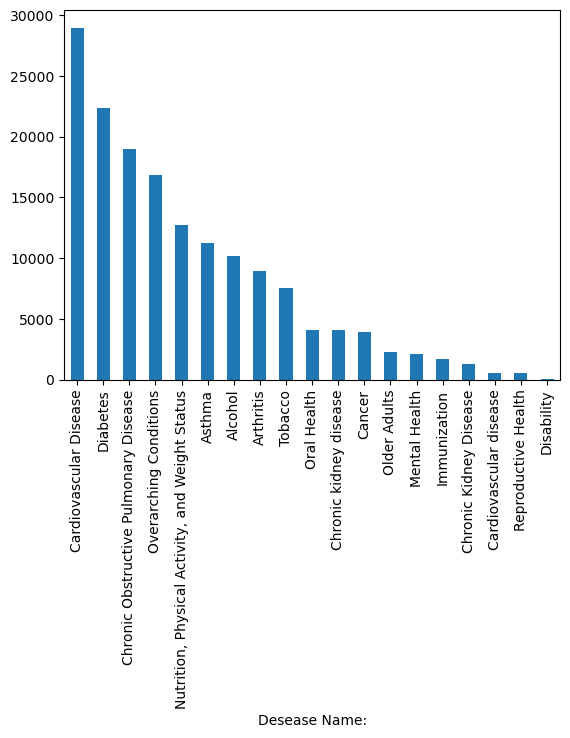

In [11]:
### Creating visualization of Topics by Highest count nationwide.
### Cardiovascular Desease appears to be a dominant nationwide.

df_clean.groupby(['Disease'])['Value'].count().sort_values(ascending=False).plot(kind='bar', xlabel='Desease Name:')

In [12]:
### Extracting the data for the Cardiovascular disease only:

df1 = df_clean[df_clean['Disease'] == 'Cardiovascular Disease']
df1.shape

(28981, 10)

In [13]:
df1.head(3)

,YearStart,YearEnd,State,Disease,Indicator,Unit,Type,Value,Category,Category_Data
87391,2010,2010,Kentucky,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Crude Rate,282,Gender,Female
87687,2014,2014,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Age-adjusted Rate,244,Gender,Male
87845,2010,2010,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Crude Rate,139.2,Race/Ethnicity,"White, non-Hispanic"


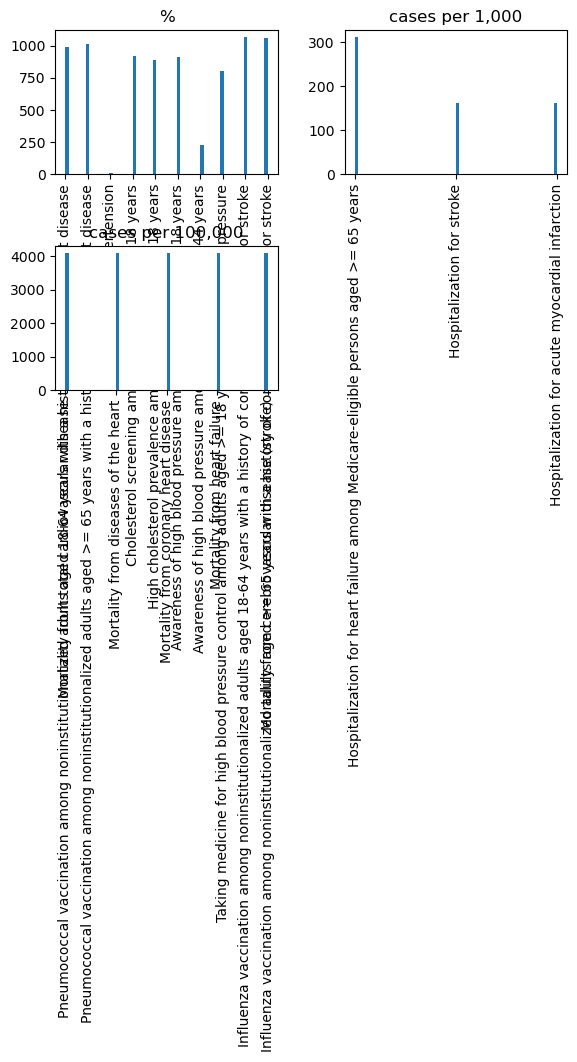

In [14]:
### ANALIZING DATA: we can see that the most complete data is for cases per 100,000:
df1.hist(column='Indicator', by='Unit', bins=60)
plt.show()

In [15]:
### Extracting the data for Units referring to cases per 100,000 only:

df2 = df1[df1['Unit'] == 'cases per 100,000']
df2.head(5)

,YearStart,YearEnd,State,Disease,Indicator,Unit,Type,Value,Category,Category_Data
87391,2010,2010,Kentucky,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Crude Rate,282,Gender,Female
87687,2014,2014,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Age-adjusted Rate,244,Gender,Male
87845,2010,2010,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Crude Rate,139.2,Race/Ethnicity,"White, non-Hispanic"
87863,2010,2010,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Age-adjusted Rate,198,Race/Ethnicity,"White, non-Hispanic"
87950,2011,2011,Alaska,Cardiovascular Disease,Mortality from total cardiovascular disease,"cases per 100,000",Crude Rate,146.3,Race/Ethnicity,"White, non-Hispanic"


In [16]:
df2.shape

(20450, 10)

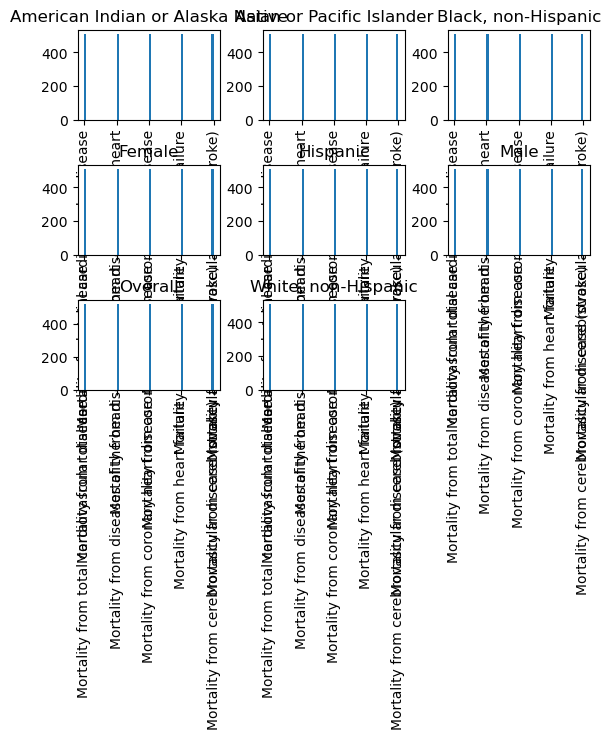

In [17]:
### Displaying data by Categories of gender and race:

df2.hist(column='Indicator', by='Category_Data', bins=60)
plt.show()

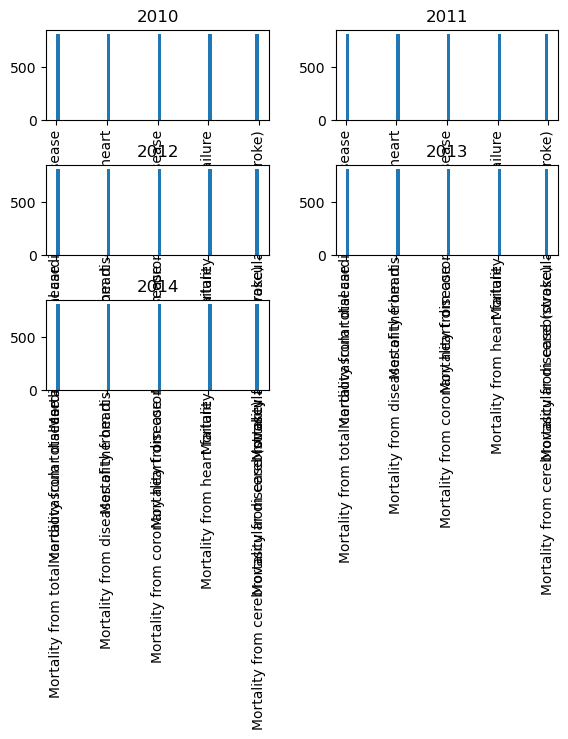

In [18]:
### Displaying data by Years:

df2.hist(column='Indicator', by='YearStart', bins=60)
plt.show()

In [29]:
### Converting Value to Numeric:

### df2['Value'] = df2['Value'].astype(int)

df2['Value'] = df2['Value'].replace(r'^\s*$', 0, regex=True)  

### Replace empty strings with 0
df2['Value'] = df2['Value'].astype(float)

### Check the data types
print(df2.dtypes)

YearStart          int64
YearEnd            int64
State             object
Disease           object
Indicator         object
Unit              object
Type              object
Value            float64
Category          object
Category_Data     object
dtype: object


/var/folders/c7/mz1tyr_52blbghjw2d3b8z1c0000gn/T/ipykernel_35245/498214549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Value'] = df2['Value'].replace(r'^\s*$', 0, regex=True)
/var/folders/c7/mz1tyr_52blbghjw2d3b8z1c0000gn/T/ipykernel_35245/498214549.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Value'] = df2['Value'].astype(float)


In [30]:
# Calculate average values for each disease indicator:
avg_values = df2.groupby('Indicator')['Value'].mean().reset_index()
avg_values 

,Indicator,Value
0,Mortality from cerebrovascular disease (stroke),28.267262
1,Mortality from coronary heart disease,78.524939
2,Mortality from diseases of the heart,134.485501
3,Mortality from heart failure,63.827751
4,Mortality from total cardiovascular disease,181.557188


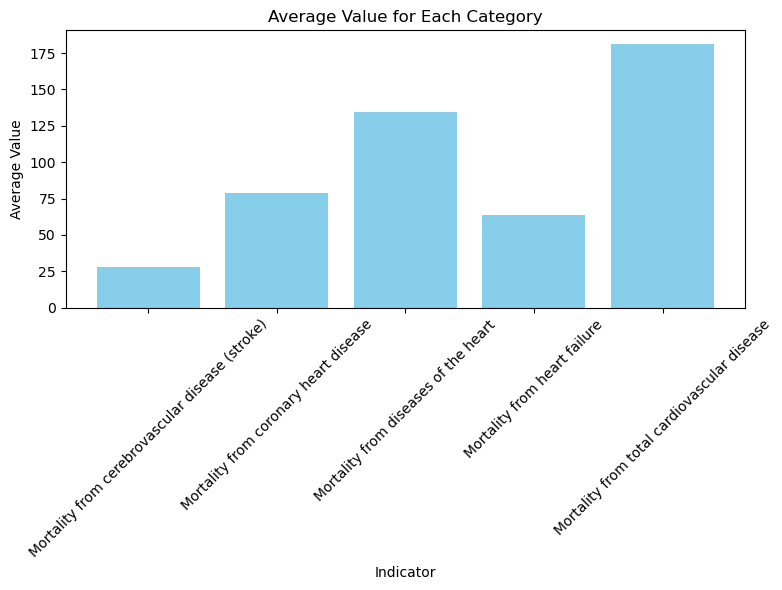

In [32]:
### Visualization by Type of Mortality from the Cardiovascular desease by Indicator:

plt.figure(figsize=(8, 6))
plt.bar(avg_values['Indicator'], avg_values['Value'], color='skyblue')
plt.title('Average Value for Each Category')
plt.xlabel('Indicator')
plt.ylabel('Average Value')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

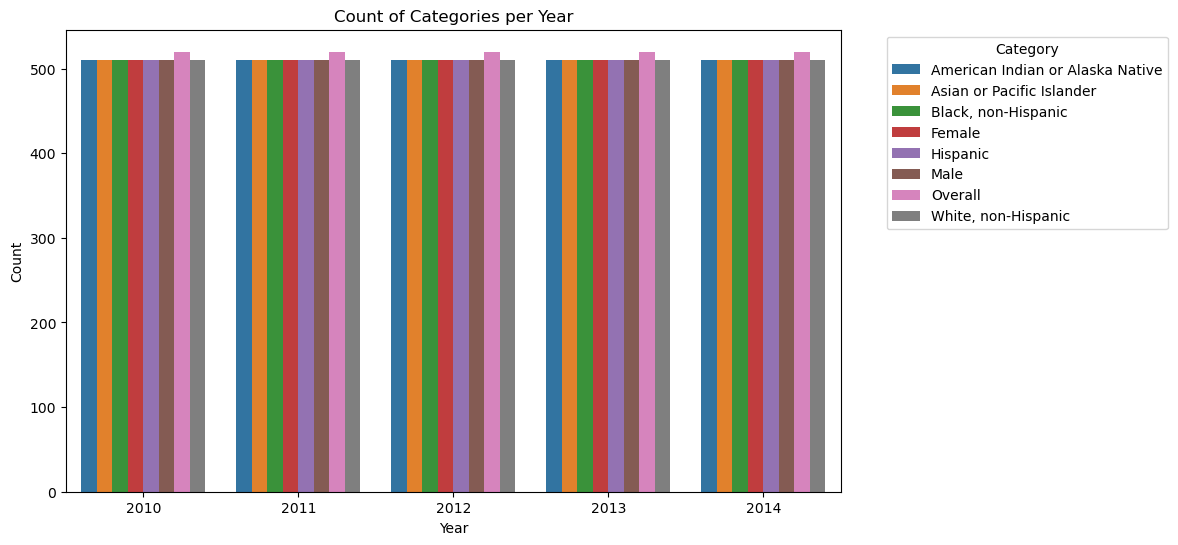

In [34]:
### Groiupping data by Year and creating a visualization:

counts = df2.groupby(['YearStart', 'Category_Data']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='YearStart', y='Count', hue='Category_Data')
plt.title('Count of Categories per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

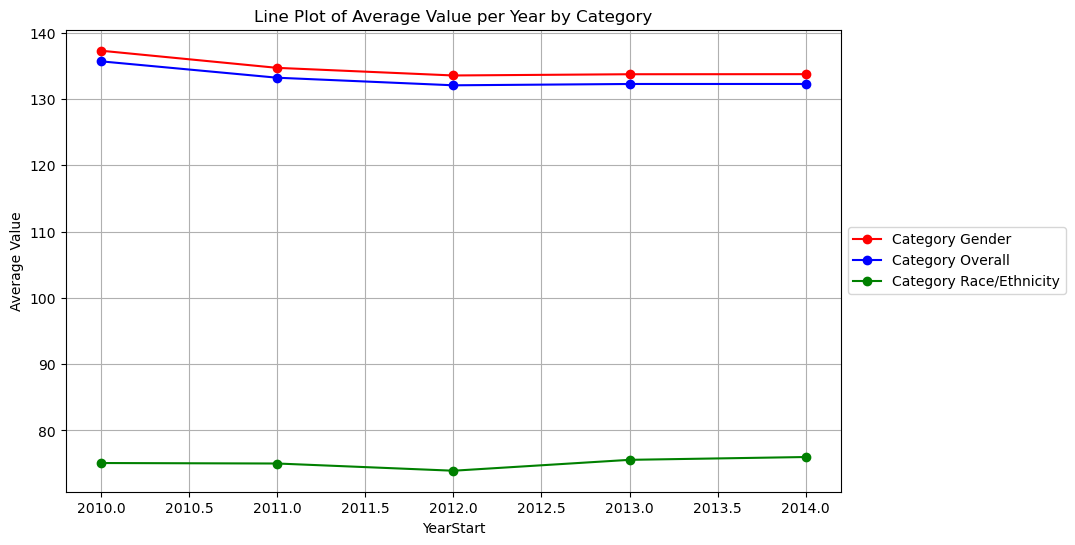

In [35]:
### Analizing data by year, Gender and race/Ethnicity:

avg_values = df2.groupby(['YearStart', 'Category'])['Value'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
for category, color in zip(avg_values['Category'].unique(), ['red', 'blue', 'green', 'orange']):
    df_category = avg_values[avg_values['Category'] == category]
    plt.plot(df_category['YearStart'], df_category['Value'], marker='o', linestyle='-', color=color, label=f'Category {category}')

plt.title('Line Plot of Average Value per Year by Category')
plt.xlabel('YearStart')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend to the right side
plt.grid(True)
plt.show()

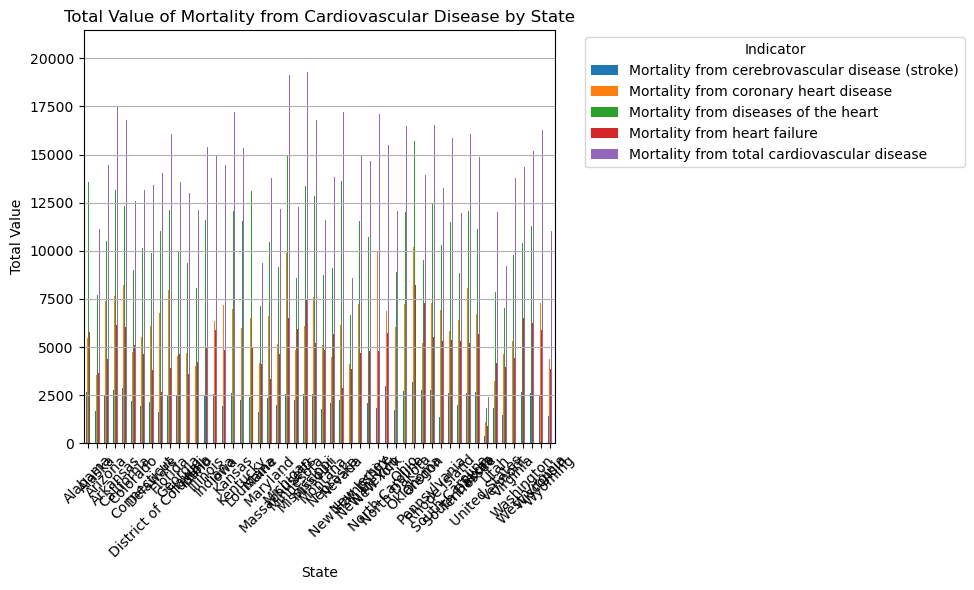

In [40]:
### Groupping the Mortality from Cardiovascular disease by Indicaor and by State:

grouped_data = df2.groupby(['State', 'Indicator'])['Value'].sum().unstack()

### Creating visualization for the Mortality from Cardiovascular disease by State:

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Total Value of Mortality from Cardiovascular Disease by State')
plt.xlabel('State')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

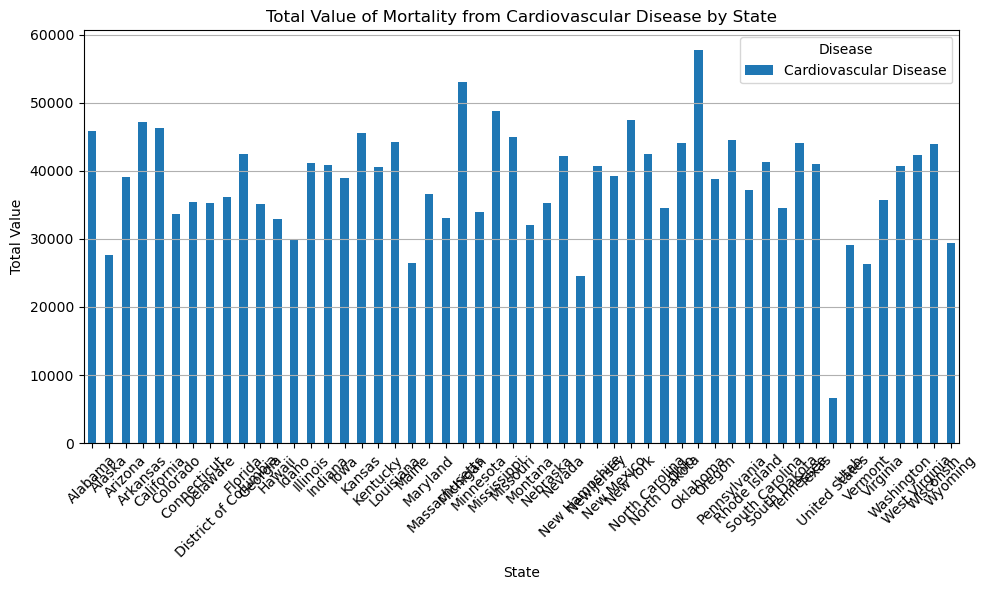

In [38]:
### Groupping the Mortality from Cardiovascular disease by State:

grouped_data1 = df2.groupby(['State', 'Disease'])['Value'].sum().unstack()

### Creating visualization for the Mortality from Cardiovascular disease by State:

grouped_data1.plot(kind='bar', figsize=(10, 6))
plt.title('Total Value of Mortality from Cardiovascular Disease by State')
plt.xlabel('State')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [23]:
### Export DataFrame to Excel:
df2.to_excel('/Users/tanyahanks/Desktop/output_with_clean_data.xlsx', index=False, sheet_name='Sheet1')


In [24]:
### Export DataFrame to CSV:
df.to_csv('/Users/tanyahanks/Desktop/output_with_clean_data.csv', index=False)

# Conclusion:

In [41]:
### Indicators classified as Cardiovascular Diseases are the leading chronic diseasaes in the United States.
### There is no significant difference found betweeen the reported years 2010-2014.
### There is no clarity of any diffrence between the gender and/or Race/ethnicity, therefore mode research is required.
### Data has been exported to Excel and CSV for further evaluation in Tableau.